<a href="https://colab.research.google.com/github/PiotrKapusta135/RedditClassifier/blob/master/Reddit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reddit Classifier

In [24]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import string

from gensim.models import word2vec

from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
cars = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cars_titles.csv')
cooking = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cooking_titles.csv')
gaming = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gaming_titles.csv')
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_titles.csv')
political = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/political_titles.csv')
science = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/science_titles.csv')
soccer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/soccer_titles.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reddit_test_Data_final.csv')


In [28]:
test.head()

,Unnamed: 0,Title,Category
0,0,One of One,cars
1,1,I got a question can we all agree that GM is g...,cars
2,2,1 of 1,cars
3,3,Is my SC on his way out? :( Cooper r53,cars
4,4,New Honda HR-V Revealed for Europe with Hybrid...,cars


In [29]:
test['Category'].value_counts()

cooking      1000
political    1000
soccer       1000
science      1000
games        1000
movies       1000
cars         1000
Name: Category, dtype: int64

In [30]:
titles = pd.concat([cars, cooking, gaming, movies, political, science, soccer])

In [31]:
titles.drop('Unnamed: 0',axis=1, inplace=True)

In [32]:
titles.sample(5)

,Title,Category
19696,Donald Trump pardons Steve Bannon amid last ac...,political
6318,Power seating for 2004 Mercedes E320,cars
11035,Ronaldo,soccer
14872,The Spire In The Woods Updates: Is The Reddit ...,movies
6256,Write My Nursing Journal | Best Online Nursing...,science


In [9]:
titles_categories = titles['Category'].unique()

In [10]:
def generate_text(categories):
    strings = []
    for category in categories:
        text = " ".join(title for title in titles[titles['Category'] == category]['Title'])
        strings.append(text)
    return strings

In [11]:
stopwords = set(STOPWORDS)

In [12]:
def generate_WordCloud():
    clouds = []
    for string in generate_text(titles_categories):
        cloud = WordCloud(stopwords=stopwords).generate(string)
        clouds.append(cloud)
    return clouds

In [13]:
clouds = generate_WordCloud()

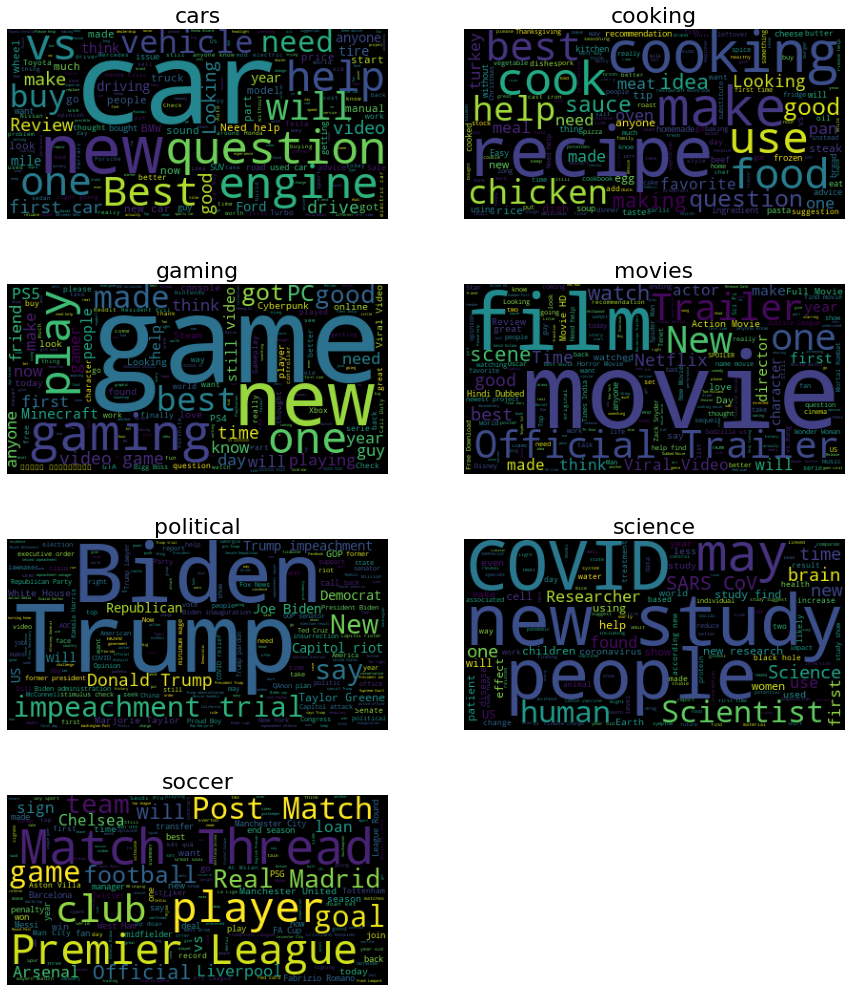

In [14]:
fig = plt.figure(figsize=(15, 18))
for i, cloud in enumerate(clouds):
    fig.add_subplot(4,2,i+1)
    plt.title(titles_categories[i], fontsize = 22)
    plt.axis('off')
    plt.imshow(cloud)
plt.show()

## EDA

In [15]:
missing = titles.isnull().sum()
print('Missing values:\n{}'.format(missing))

Missing values:
Title       0
Category    0
dtype: int64


## Preprocessing

In [16]:
titles['Title'].head(1)

0    Gangster just saying
Name: Title, dtype: object

In [17]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

remove_punctuation = lambda text: text.translate(str.maketrans('','', string.punctuation))
tokenize = lambda text: nltk.word_tokenize(text)
#remove_whitespace = lambda text: [x.strip(' ') for x in text]
remove_stopwords = lambda text: ' '.join([word for word in text.split() if word not in stopwords])
remove_numbers = lambda text: ' '.join([word for word in text.split() if not word.isdigit()])
lemmatization = lambda text: ' '.join([lemmatizer.lemmatize(word, pos='v') for word in text.split()])

def remove_whitespaces(text):
    texty = []
    for token in text:
        token = token.split()[0]
        texty.append(token)
    return texty

def preprocess(text):
    text = text.lower()
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_numbers(text)
    text = lemmatization(text)
    #text = tokenize(text)
    #ext = remove_whitespaces(text)
    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
titles['Title_new'] = titles['Title'].apply(preprocess)
test['Title'] = test['Title'].apply(preprocess)

In [20]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(titles['Title_new'])
titles['Title_new'] = tokenizer.texts_to_sequences(titles['Title_new'])
test['Title'] = tokenizer.texts_to_sequences(test['Title'])

In [21]:
titles.head()

,Title,Category,Title_new
0,Gangster just saying,cars,[15]
1,1 quart motor oil in transmission no choice bu...,cars,"[1176, 277, 729, 2059, 98, 3744, 11, 229]"
2,A Hypothetical Car Buying Situation... Need Ad...,cars,"[5, 35, 1515, 21, 217]"
3,What is cash flow statement,cars,"[1892, 2308, 1422]"
4,Tyres Services,cars,"[5836, 549]"


In [22]:
titles.drop('Title', axis=1, inplace=True)

In [23]:
titles = titles.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)

In [26]:
category_encoder = LabelEncoder()
category_encoder.fit(titles['Category'])

titles['Category'] = category_encoder.transform(titles['Category'])
test['Category'] = category_encoder.transform(test['Category'])

ValueError: ignored

In [ ]:
titles.head()

In [25]:
test['Category']['car'] ='cars'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Modeling

In [ ]:
X = titles['Title_new']
y = titles['Category']
X = sequence.pad_sequences(X, maxlen=70)
y = to_categorical(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.20, shuffle=True)

X_test = test['Titles']
y_test = test['Category']
X_test = sequence.pad_sequences(X_test, maxlen = 70)
y_test = to_categorical(y_test)

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

In [ ]:
model = Sequential()
model.add(Embedding(10000, 128, input_length=70))

model.add(LSTM(32, dropout=0.5, return_sequences=True))
model.add(LSTM(32, dropout=0.5, return_sequences=True))

model.add(LSTM(64, dropout=0.5, return_sequences=True))
model.add(LSTM(64, dropout=0.5, return_sequences=True))

model.add(LSTM(128, dropout=0.5))
#model.add(LSTM(256, dropout = 0.2))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, batch_size=128,validation_data=(X_test, y_test))

In [ ]:
#model.save('lstm 1x32 1x64 1x128 1x256 d05.h5')

1. Word2Vec
3. Gotowy embedding


In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy)+1)

In [ ]:
plt.plot(epochs, train_accuracy, 'g', label='training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(epochs, train_loss, 'g', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

1. 2x64 d = 0.3, 1x128 d =0.4, wym = 8 , acc = 0,8693
2. 2x64 d = 0.3, 1x128 d =0.4, wym = 16, acc = 0.8724
3. 2x64 d = 0.3,, 1x128 d =0.4, wym = 32, acc = 0.8769

In [ ]:
model.evaluate(X_test, y_test)